In [1]:
import torch
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [17]:
path = './rf_output.txt'
all_outputs = []
with open(path, 'rb') as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        cur_line = line.decode('utf-8')
        if not ("Current ratio" in cur_line) and not ('Program finished' in cur_line):
            cur_words = cur_line.strip().split(',')
            try:
                train_acc = float(cur_words[1][12:])
            except Exception as e:
                print(e)
                print(cur_words)
            test_acc = float(cur_words[2][11:])
            mae_train_acc = float(cur_words[3][12:])
            mae_test_acc = float(cur_words[4][11:])
            zo_train_acc = float(cur_words[5][16:])
            zo_test_acc = float(cur_words[6][15:])
            
            all_outputs.append((train_acc, test_acc, mae_train_acc, mae_test_acc, zo_train_acc, zo_test_acc))

In [20]:
trial_len = 5
noise = [0.0, 0.2, 0.4, 0.6]
num_leaves = [10, 1000, 2000]
num_trees = [1, 10, 20]

180

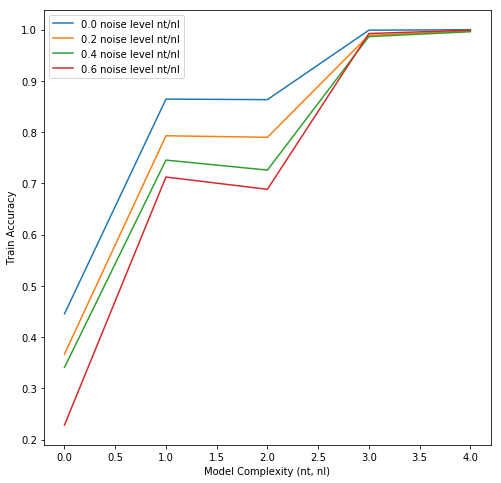

In [44]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
noise = [0.0, 0.2, 0.4, 0.6]
offset = 0
for i in range(len(noise)):
    cur_outs = all_outputs[offset::20]
    label = str(noise[i]) + ' noise level nt/nl'
    cur_x = [x[0] for x in cur_outs]
    new_x = [cur_x[0], cur_x[1], cur_x[2], cur_x[5], cur_x[8]]
    ax.plot(range(5), new_x, label=label)
    offset += trial_len

plt.xlabel('Model Complexity (nt, nl)')
plt.ylabel("Train Accuracy")
plt.legend()
plt.show()

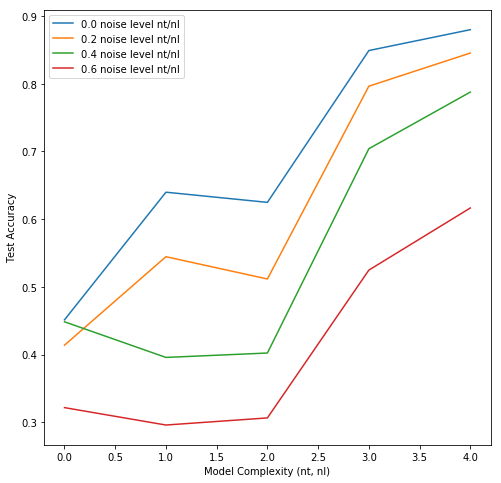

In [45]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
noise = [0.0, 0.2, 0.4, 0.6]
offset = 0
for i in range(len(noise)):
    cur_outs = all_outputs[offset::20]
    label = str(noise[i]) + ' noise level nt/nl'
    cur_x = [x[1] for x in cur_outs]
    new_x = [cur_x[0], cur_x[1], cur_x[2], cur_x[5], cur_x[8]]
    ax.plot(range(5), new_x, label=label)
    offset += trial_len

plt.xlabel('Model Complexity (nt, nl)')
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

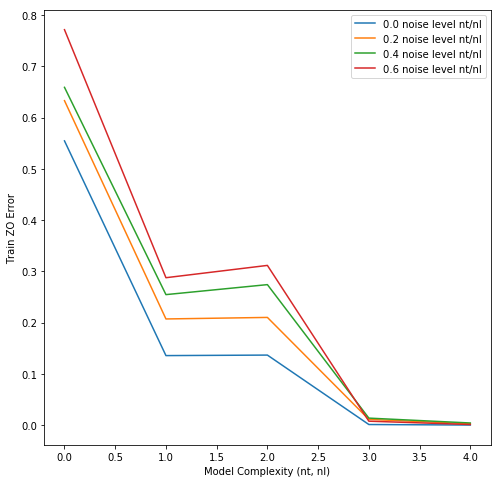

In [46]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
noise = [0.0, 0.2, 0.4, 0.6]
offset = 0
for i in range(len(noise)):
    cur_outs = all_outputs[offset::20]
    label = str(noise[i]) + ' noise level nt/nl'
    cur_x = [x[4] for x in cur_outs]
    new_x = [cur_x[0], cur_x[1], cur_x[2], cur_x[5], cur_x[8]]
    ax.plot(range(5), new_x, label=label)
    offset += trial_len

plt.xlabel('Model Complexity (nt, nl)')
plt.ylabel("Train ZO Error")
plt.legend()
plt.show()

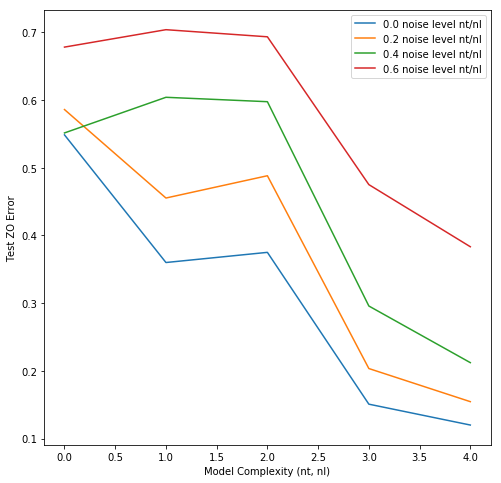

In [47]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
noise = [0.0, 0.2, 0.4, 0.6]
offset = 0
for i in range(len(noise)):
    cur_outs = all_outputs[offset::20]
    label = str(noise[i]) + ' noise level nt/nl'
    cur_x = [x[5] for x in cur_outs]
    new_x = [cur_x[0], cur_x[1], cur_x[2], cur_x[5], cur_x[8]]
    ax.plot(range(5), new_x, label=label)
    offset += trial_len

plt.xlabel('Model Complexity (nt, nl)')
plt.ylabel("Test ZO Error")
plt.legend()
plt.show()

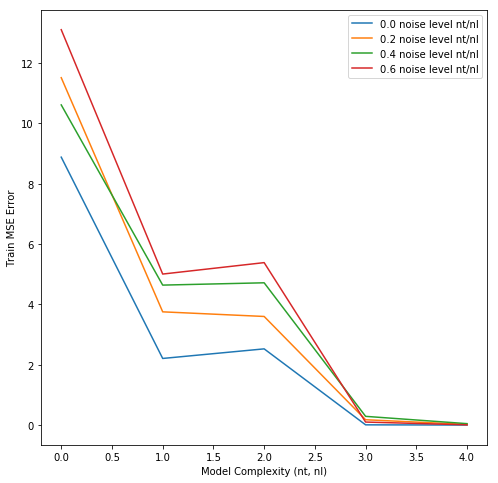

In [50]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
noise = [0.0, 0.2, 0.4, 0.6]
offset = 0
for i in range(len(noise)):
    cur_outs = all_outputs[offset::20]
    label = str(noise[i]) + ' noise level nt/nl'
    cur_x = [x[2] for x in cur_outs]
    new_x = [cur_x[0], cur_x[1], cur_x[2], cur_x[5], cur_x[8]]
    ax.plot(range(5), new_x, label=label)
    offset += trial_len

plt.xlabel('Model Complexity (nt, nl)')
plt.ylabel("Train MSE Error (Not sure why vals > 1)")
plt.legend()
plt.show()

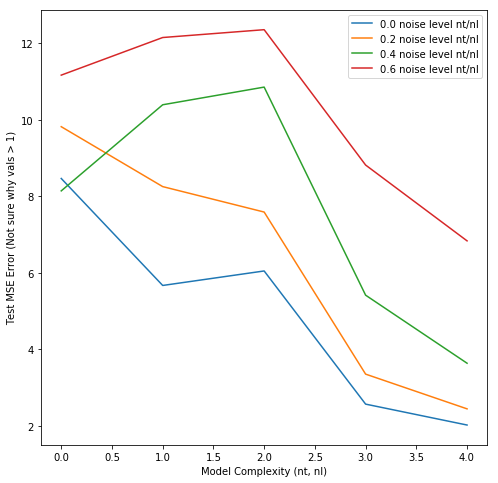

In [52]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
noise = [0.0, 0.2, 0.4, 0.6]
offset = 0 # trials
for i in range(len(noise)):
    cur_outs = all_outputs[offset::20]
    label = str(noise[i]) + ' noise level nt/nl'
    cur_x = [x[3] for x in cur_outs]
    new_x = [cur_x[0], cur_x[1], cur_x[2], cur_x[5], cur_x[8]]
    ax.plot(range(5), new_x, label=label)
    offset += trial_len

plt.xlabel('Model Complexity (nt, nl)')
plt.ylabel("Test MSE Error (Not sure why vals > 1)")
plt.legend()
plt.show()